# Data visualization and EDA metrics with pandas

In this lesson we will be using a boston housing market dataset. The columns of the dataset are coded as so:

    CRIM: per capita crime rate by town 
    ZN: proportion of residential land zoned for lots over 25,000 sq.ft. 
    INDUS: proportion of non-retail business acres per town 
    CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise) 
    NOX: nitric oxides concentration (parts per 10 million) 
    RM: average number of rooms per dwelling 
    AGE: proportion of owner-occupied units built prior to 1940 
    DIS: weighted distances to five Boston employment centres 
    RAD: index of accessibility to radial highways 
    TAX: full-value property-tax rate per 10000 dollars
    PTRATIO: pupil-teacher ratio by town 
    B: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town 
    LSTAT: % lower status of the population 
    MEDV: Median value of owner-occupied homes in 1000's of dollars
    
Each row in the dataset is for a different suburb of Boston.

These descriptions of shortened or coded variables are often described as "codebooks", or data dictionaries. They are the often found alongside datasets you might find online.

---

## 1. Load packages and data

In [13]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

sns.set_style('darkgrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

boston_file = '/Users/kiefer/github-repos/DSI-SF-2/datasets/boston_housing_data/housing.csv'
boston = pd.read_csv(boston_file)

---

## 2. Describe the basic format and variables in the data:

As you recall, you can use `.head()` (and optionally pass in an integer for the number of rows you want to see) to examine what the loaded data looks like.

The `.describe()` function will give you summary statistics for each of your variables.

The numeric data in columns has been **pre-cleaned** for you for the sake of focusing the lesson on other things (no corrupt data or string values that need to be converted to numeric). This is rarely the case in reality.

In [14]:
# print out the first 4 rows:
boston.head(4)

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4


In [22]:
a = [1,2,3,4]
a[2:3]

[3]

In [33]:
charles_river_only = (boston.CHAS == 1) & (boston.TAX < 400)
column_mask = [col for col in boston.columns if len(col) == 3]
#print charles_river_only

tmp = boston.loc[charles_river_only, column_mask].head(3)
print tmp
ones = np.ones((3,5))
print ones

tmp.iloc[:,:] = ones
tmp.iloc[:, 0] = np.array([1,2,3])
print tmp


       NOX    AGE     DIS  RAD  TAX
208  0.489   59.1  4.2392    4  277
209  0.489  100.0  3.8750    4  277
210  0.489   92.1  3.8771    4  277
[[ 1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.]]
     NOX  AGE  DIS  RAD  TAX
208    1  1.0  1.0  1.0  1.0
209    2  1.0  1.0  1.0  1.0
210    3  1.0  1.0  1.0  1.0


### Unwanted columns:

The `.read_csv()` function has added a column called `Unnamed: 0`, which appears to be just the number of the rows. We already have the number id of the rows in the DataFrame's index.

In [10]:
# print out the index object and the first 20 items in the DataFrame's index 
# to see that we have these row numbers already:
#print boston.CRIM
type(boston.CRIM.values)
print boston.index
print boston.index.values[0:20]
print boston.shape

RangeIndex(start=0, stop=506, step=1)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
(506, 15)


In [11]:
# Remove the unneccesary column:
boston.drop('Unnamed: 0', axis=1, inplace=True)

In [12]:
boston.drop(3, axis=0, inplace=True)
boston.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


### Make the column names more descriptive

The codes are fine for some people, but I don't like having to memorize or reference the codebook whenever I want to know the meaning of a variable.

There is more than one way to do this. I am going to use the explicit `.rename()` function.

    CRIM: per capita crime rate by town 
    ZN: proportion of residential land zoned for lots over 25,000 sq.ft. 
    INDUS: proportion of non-retail business acres per town 
    CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise) 
    NOX: nitric oxides concentration (parts per 10 million) 
    RM: average number of rooms per dwelling 
    AGE: proportion of owner-occupied units built prior to 1940 
    DIS: weighted distances to five Boston employment centres 
    RAD: index of accessibility to radial highways 
    TAX: full-value property-tax rate per 10000 dollars
    PTRATIO: pupil-teacher ratio by town 
    B: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town 
    LSTAT: % lower status of the population 
    MEDV: Median value of owner-occupied homes in 1000's of dollars

In [35]:
boston.drop('Unnamed: 0', axis=1, inplace=True)

In [36]:
boston.rename(columns={
        'CRIM':'rate_of_crime',
        'ZN':'residential_zone_pct',
        'INDUS':'business_zone_pct',
        'CHAS':'borders_river',
        'NOX':'oxide_concentration',
        'RM':'average_rooms',
        'AGE':'owner_occup_pct',
        'DIS':'dist_to_work',
        'RAD':'access_to_highway',
        'TAX':'property_tax',
        'PTRATIO':'student_teacher_ratio',
        'B':'black_stat',
        'LSTAT':'pct_underclass',
        'MEDV':'home_median_value'
    }, inplace=True)

In [37]:
boston.head(3)

,rate_of_crime,residential_zone_pct,business_zone_pct,borders_river,oxide_concentration,average_rooms,owner_occup_pct,dist_to_work,access_to_highway,property_tax,student_teacher_ratio,black_stat,pct_underclass,home_median_value
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7


### Describe the variables

Use the `.describe()` function here. What are some, if any, oddities you notice about the variables.

In [38]:
boston.describe()


,rate_of_crime,residential_zone_pct,business_zone_pct,borders_river,oxide_concentration,average_rooms,owner_occup_pct,dist_to_work,access_to_highway,property_tax,student_teacher_ratio,black_stat,pct_underclass,home_median_value
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


There are some potential outliers in variables here:

1. black_stat has at least one outlier at the min end of the range.
2. owner_occup_pct has at least one outlier at the min end.
3. business_zone_pct might have an outlier at the min end.
4. rate_of_crime has at least one outlier at the max end.

---

## 3. Plot variables with potential outliers using seaborn boxplots.

Some notes on seaborn's boxplot keyword argument options that I'm going to use:

    orient: can be 'v' or 'h' for vertical and horizontal, respectively
    fliersize: the size of the outlier points (pixels I think)
    linewidth: the width of line outlining the boxplot
    notch: show the confidence interval for the median (calculated by seaborn/plt.boxplot)
    saturation: saturate the colors to an extent
    
    

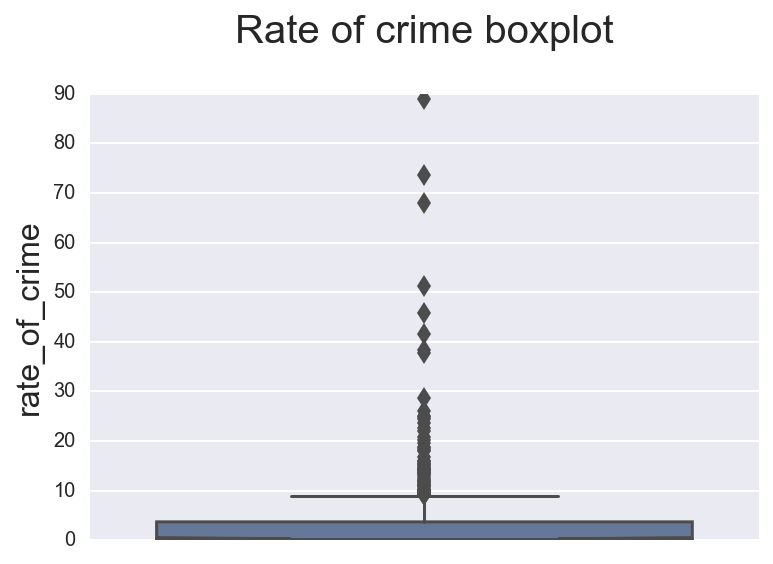

In [40]:
# rate of crime
fig = plt.figure(figsize=(6,4))
ax = fig.gca()

ax = sns.boxplot(boston.rate_of_crime, orient='v',
                fliersize=8, linewidth=1.5, notch=True,
                saturation=0.5, ax=ax)

ax.set_ylabel('rate_of_crime', fontsize=16)
ax.set_title('Rate of crime boxplot\n', fontsize=20)

plt.show()

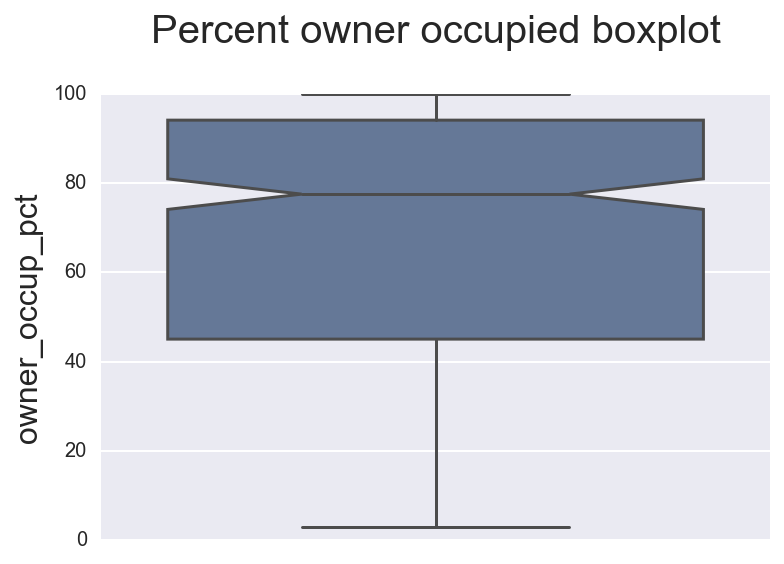

In [41]:
# percent owner occupied
fig = plt.figure(figsize=(6,4))
ax = fig.gca()

ax = sns.boxplot(boston.owner_occup_pct, orient='v',
                fliersize=8, linewidth=1.5, notch=True,
                saturation=0.5, ax=ax)

ax.set_ylabel('owner_occup_pct', fontsize=16)
ax.set_title('Percent owner occupied boxplot\n', fontsize=20)

plt.show()

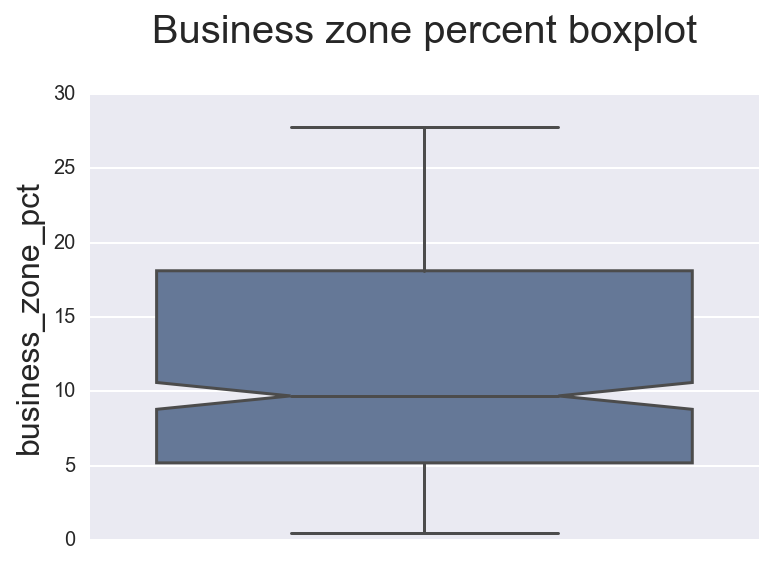

In [42]:
# business zone percent
fig = plt.figure(figsize=(6,4))
ax = fig.gca()

ax = sns.boxplot(boston.business_zone_pct, orient='v',
                fliersize=8, linewidth=1.5, notch=True,
                saturation=0.5, ax=ax)

ax.set_ylabel('business_zone_pct', fontsize=16)
ax.set_title('Business zone percent boxplot\n', fontsize=20)

plt.show()

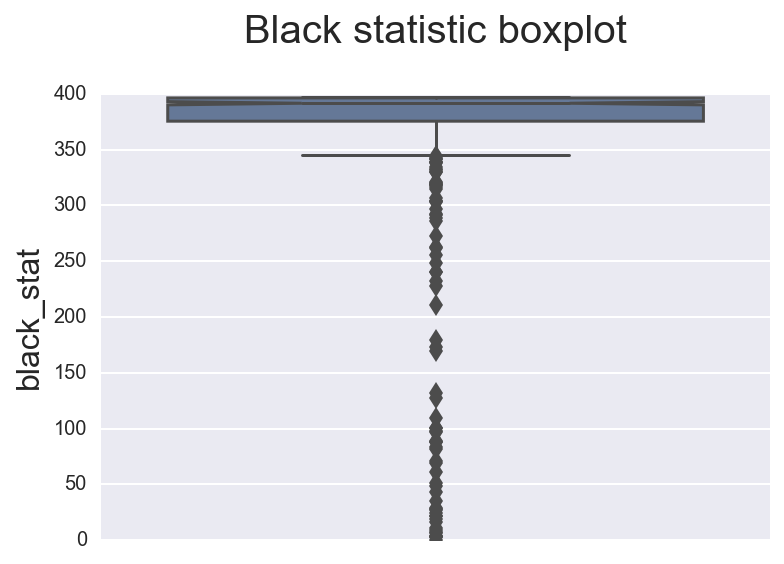

In [43]:
# black population statistic
fig = plt.figure(figsize=(6,4))
ax = fig.gca()

ax = sns.boxplot(boston.black_stat, orient='v',
                fliersize=8, linewidth=1.5, notch=True,
                saturation=0.5, ax=ax)

ax.set_ylabel('black_stat', fontsize=16)
ax.set_title('Black statistic boxplot\n', fontsize=20)

plt.show()

From the boxplots, it looks like rate of crime and the proportion black people statistic have real outliers. The other variables actually look OK to me.

---

## 4. Plot all the variables on boxplots together.

Let's try this first with the variables as they are, using a horizontal boxplot with seaborn.

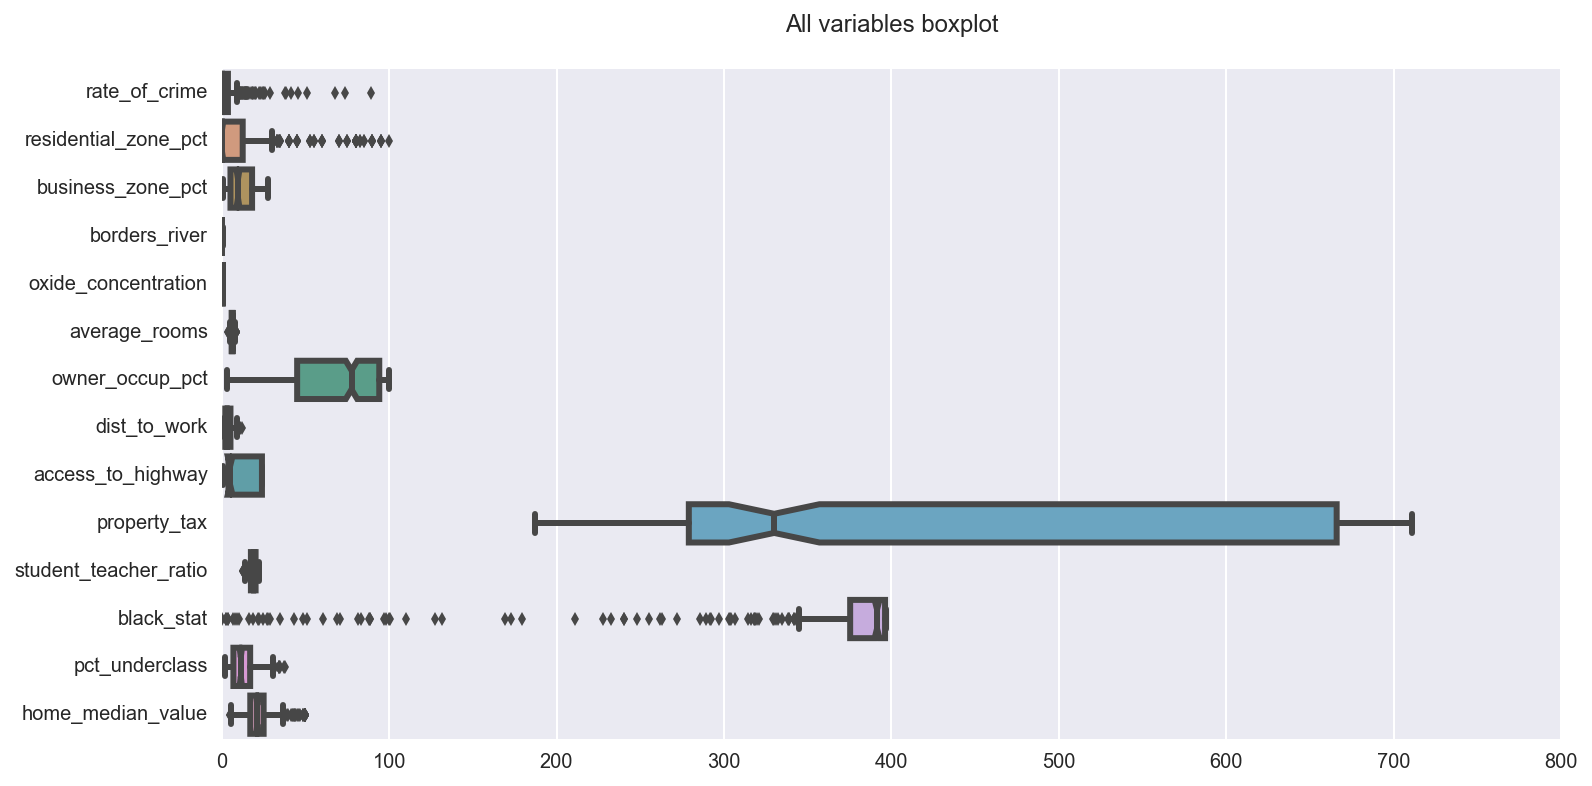

In [49]:
fig = plt.figure(figsize=(12,6))
ax = fig.gca()

ax = sns.boxplot(data=boston, orient='h', fliersize=5, linewidth=3, notch=True,
                 saturation=0.5, ax=ax)

ax.set_title('All variables boxplot\n')
plt.show()

The boxplots are hard to visualize since all of these variables are on different scales.

---

## 5. Rescaling variables and plotting again.

Rescaling of variables is very common, and in fact when we get to regularization in models during upcoming weeks the rescaling procedure is actually going to become essential for the regularization to work.

Let's rescale the variables using a procedure called "standardization" or alternatively "normalization".

Normalization is a concise process:

    normalized_variable = (variable - mean_of_variable) / std_dev_of_variable
    
What does this do, exactly? It forces the variable's values to have a mean of 0 and a standard deviation of 1. Nothing else is changed about the distribution of the variable. It doesn't become "normal" or anything. 

### 5.1 Extract rate of crime and plot the distribution 

Also print out the mean and standard deviation of the original variable.

In [52]:
roc = boston.rate_of_crime.values
roc_mean = np.mean(roc)
roc_std = np.std(roc)
print roc_mean, roc_std

3.61352355731 8.5930413513


Normalize the rate_of_crime variable and plot again. Notice the new mean is centered at 0.

In [53]:
roc_norm = (roc - roc_mean) / roc_std
print np.mean(roc_norm), np.std(roc_norm)

-1.12338772452e-16 1.0


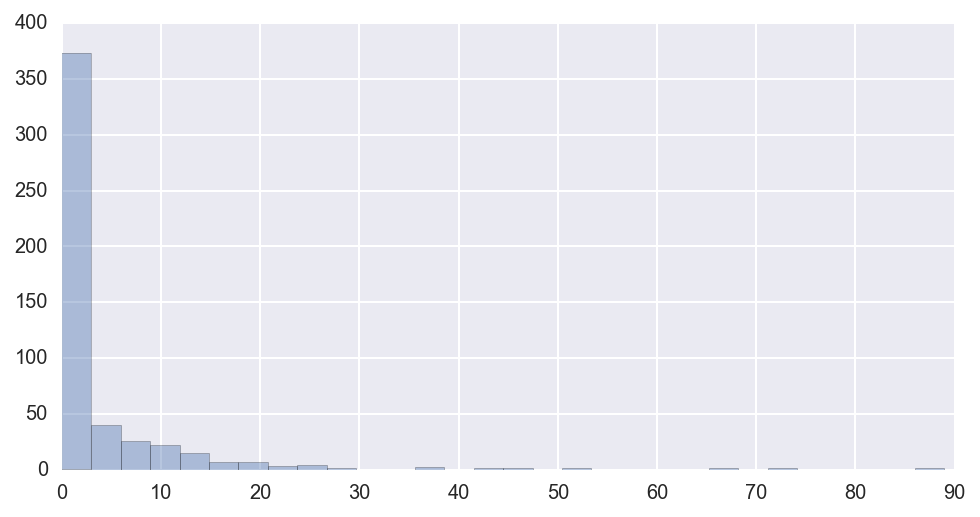

In [57]:
fig = plt.figure(figsize=(8,4))
ax = fig.gca()

ax = sns.distplot(roc, bins=30, kde=False)
plt.show()

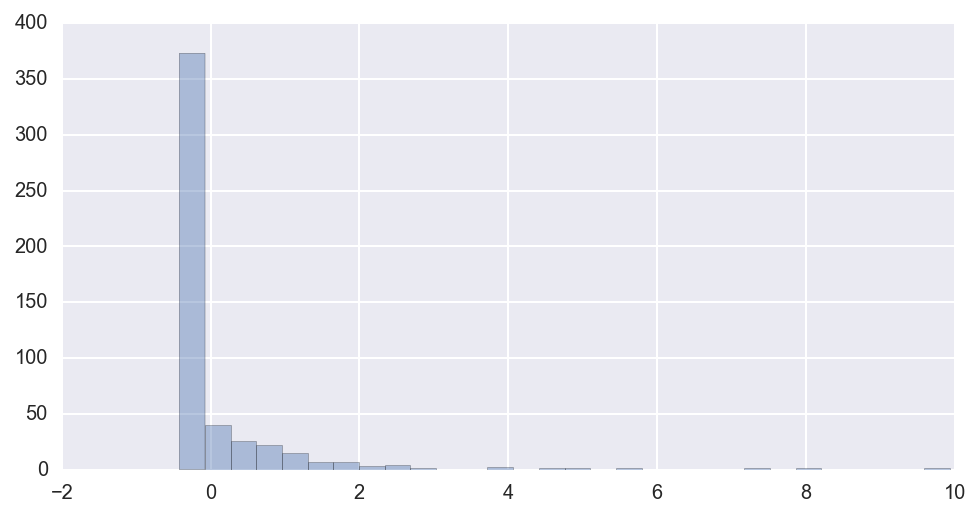

In [58]:
fig = plt.figure(figsize=(8,4))
ax = fig.gca()

ax = sns.distplot(roc_norm, bins=30, kde=False)
plt.show()

In [59]:
boston.mean()

rate_of_crime              3.613524
residential_zone_pct      11.363636
business_zone_pct         11.136779
borders_river              0.069170
oxide_concentration        0.554695
average_rooms              6.284634
owner_occup_pct           68.574901
dist_to_work               3.795043
access_to_highway          9.549407
property_tax             408.237154
student_teacher_ratio     18.455534
black_stat               356.674032
pct_underclass            12.653063
home_median_value         22.532806
dtype: float64

Print the normalized variable with outliers removed. Let's set the criteria for outliers to be any values that are above 4 * the std_dev of the variable (which is now just 4, since we have forced the standard deviation to be 1 through normalization!)

The variable is still extremely skewed. Dealing with this is a more difficult issue and we will explore this at a later time! (One of your challege/expert problems in Project 2 teaches one method to try and deal with skewness in a variable – keep in mind, however, no method to get rid of skewness is perfect.)

---

## 6. Normalize all the variables and plot the full boxplot again.

Pandas DataFrames actually make it extremely easy to normalize columns all at once. Say we have a DataFrame `data`, then we can normalize all the columns like so:

    data_norm = (data_norm - data.mean()) / data.std()

In [61]:
boston_norm = (boston - boston.mean()) / boston.std()

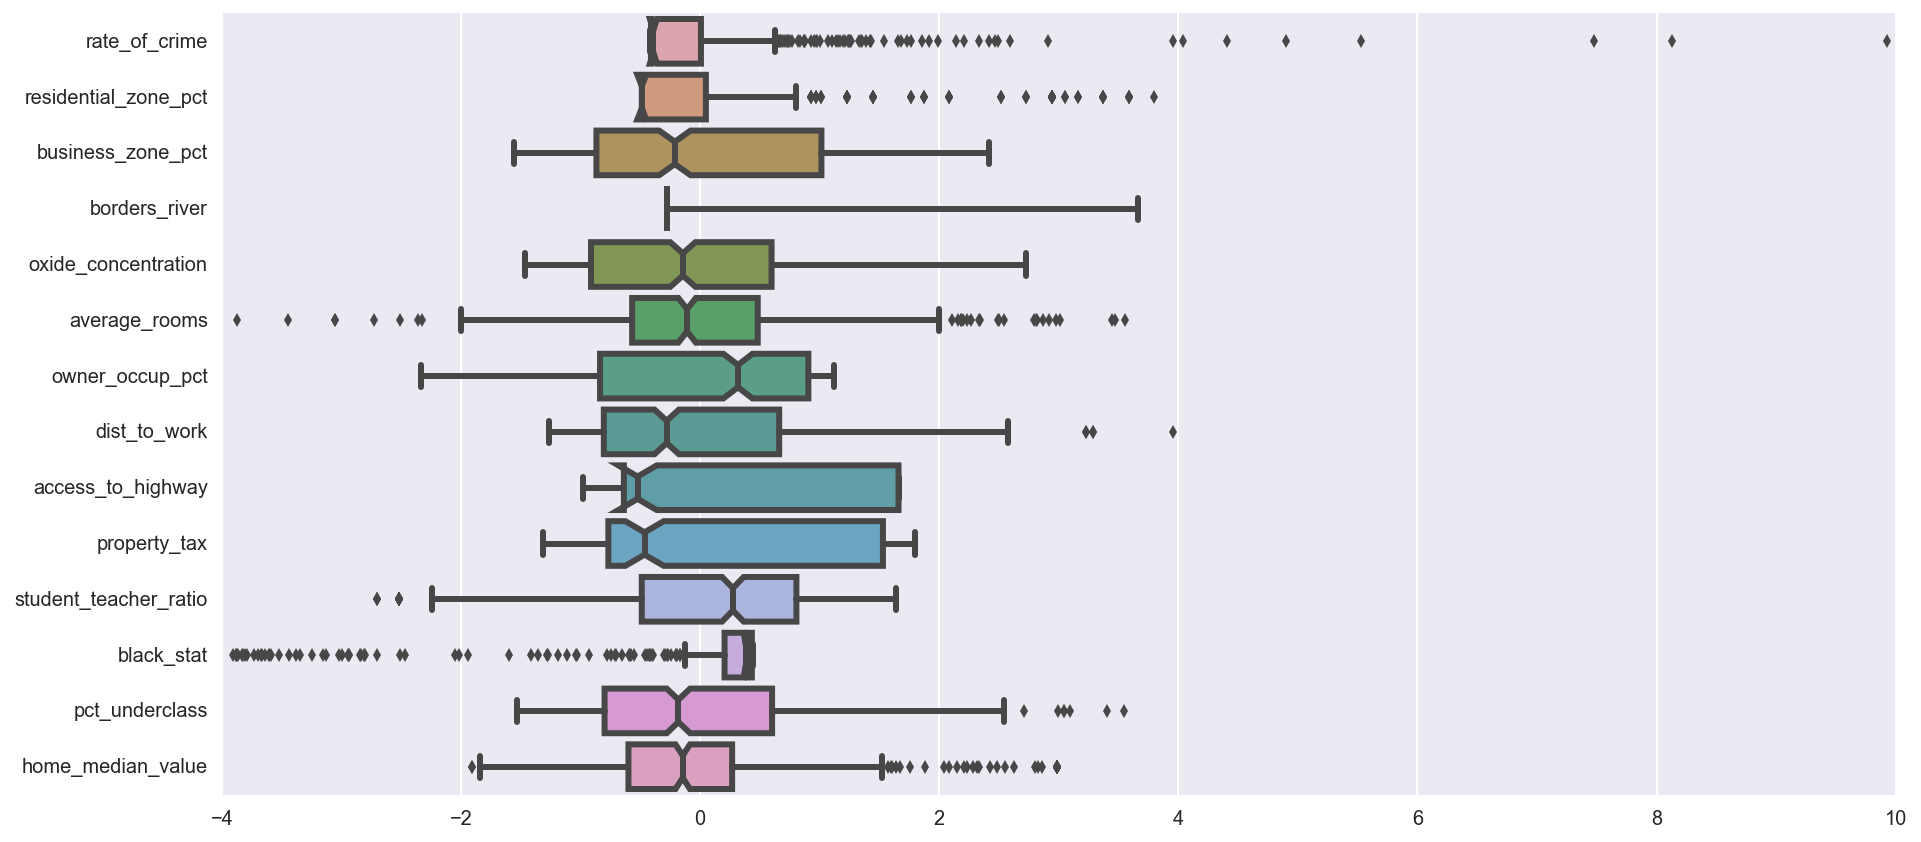

In [62]:
fig = plt.figure(figsize=(15, 7))
ax = fig.gca()

ax = sns.boxplot(data=boston_norm, orient='h', fliersize=5, 
                 linewidth=3, notch=True, saturation=0.5, ax=ax)
plt.show()

---

## 6. Covariance and correlation of variables

A great way to immediately get a feel for relationships between your variables is with a correlation matrix.

Let's first examine the covariance and the correlation and calculate these by hand.

### 6.1 Covariance of variables

Given sample size $N$ variables $X$ and $Y$, with means $\bar{X}$ and $\bar{Y}$:

### $$ \text{covariance}(X, Y) = \sum_{i=1}^N \frac{(X - \bar{X})(Y - \bar{Y})}{N}$$

The covariance is a measure of "relatedness" between variables. It is literally the sum of deviations from the mean of $X$ times deviations from the mean of $Y$ adjusted by the sample size $N$.

Code the covariance between `pct_underclass` and `home_median_value` below by hand. Verify that you got the correct result using `np.cov()`. Set the keyword argument `bias=True` in `np.cov()` to have it use the same covariance calculation.

Note: `np.cov` returns a covariance _matrix_, which will be each values covariance with itself and the other variable in matrix format.

In [67]:
pct_under = boston.pct_underclass.values
med_val = boston.home_median_value.values

under_val_cov = np.sum((pct_under - np.mean(pct_under))*(med_val - np.mean(med_val)))/len(pct_under)
print under_val_cov
print np.cov(pct_under, med_val, bias=True)

-48.3517921933
[[ 50.89397935 -48.35179219]
 [-48.35179219  84.41955616]]


### 6.2 Correlation of variables

What's the problem with covariance? Well, its not very interpretable. The values are difficult to read because they are relative to the variance of the variables.

A much more common metric, and one easily calculable from the covariance, is the correlation.

Again, let $X$ and $Y$ be our two variables, with covariance $cov(X, Y)$ that we calculated above:

### $$ \text{pearson correlation}\;r = cor(X, Y) =\frac{cov(X, Y)}{std(X)std(Y)}$$

What the pearson correlation does is in fact directly related to what we did above during the normalization procedure. We are taking the covariance and dividing it by the product of the standard deviations of X and Y. This adjusts the value we get out by the variance of the variables so that $r$ must fall between -1 and 1.

Calculate the correlation between `pct_under` and `med_value` by hand below. Check that it is the same as `np.corrcoef()` with `bias=True`:


In [68]:
uv_corr = under_val_cov / (np.std(pct_under) * np.std(med_val))
print uv_corr
print np.corrcoef(pct_under, med_val, bias=True)

-0.737662726174
[[ 1.         -0.73766273]
 [-0.73766273  1.        ]]


### 6.3 The correlation matrix

We can see the correlation between all the numeric variables in our dataset by using pandas DataFrame's built in `.corr()` function. Use it below on the boston dataset.

It is very useful to get a feel for what is related and what is not, which can help you decide what is worth investigating further (though with a lot of variables, the matrix can be a bit overwhelming...)

In [69]:
boston.corr()

,rate_of_crime,residential_zone_pct,business_zone_pct,borders_river,oxide_concentration,average_rooms,owner_occup_pct,dist_to_work,access_to_highway,property_tax,student_teacher_ratio,black_stat,pct_underclass,home_median_value
rate_of_crime,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
residential_zone_pct,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
business_zone_pct,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
borders_river,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
oxide_concentration,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
average_rooms,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
owner_occup_pct,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dist_to_work,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
access_to_highway,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
property_tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


---

## 7. Scatterplots

Choose two variables that appear very related and two variables that appear to be unrelated.

Use seaborns `regplot` to plot a scatter plot between the pairs of variables. `regplot` will also plot a regression line by default – we will go into regressions next week. They are, as you might expect, very related to correlations. You can turn this off with `fit_reg=False` if you want.